In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
import plotly.express as px

In [142]:
df = pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [143]:
df.shape

(180, 9)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [145]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [146]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

# Identifying Outliers

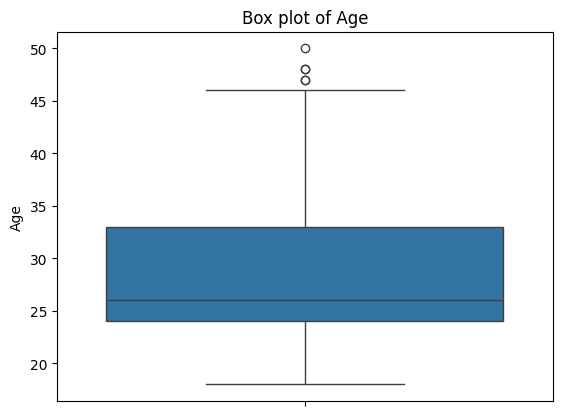

In [147]:
sns.boxplot(data= df['Age'])
plt.title('Box plot of Age')
plt.show()

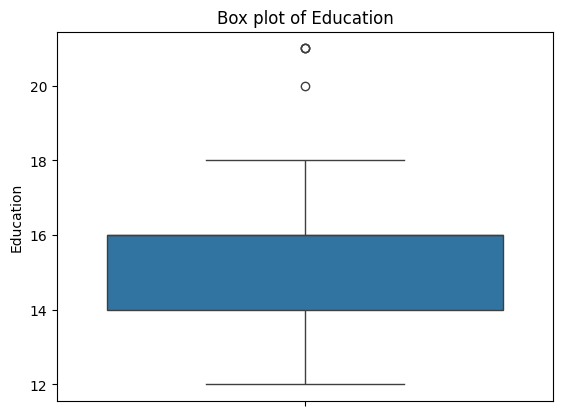

In [148]:
sns.boxplot(data= df['Education'])
plt.title('Box plot of Education')
plt.show()

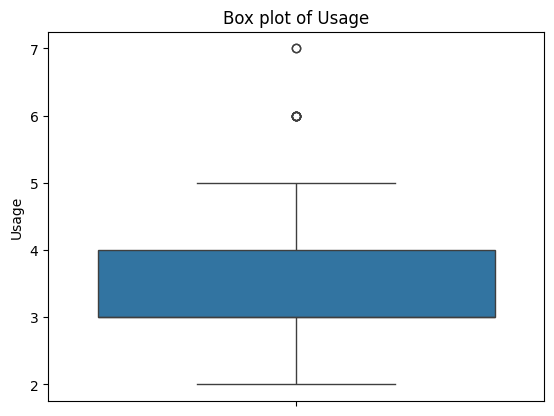

In [149]:
sns.boxplot(data= df['Usage'])
plt.title('Box plot of Usage')
plt.show()

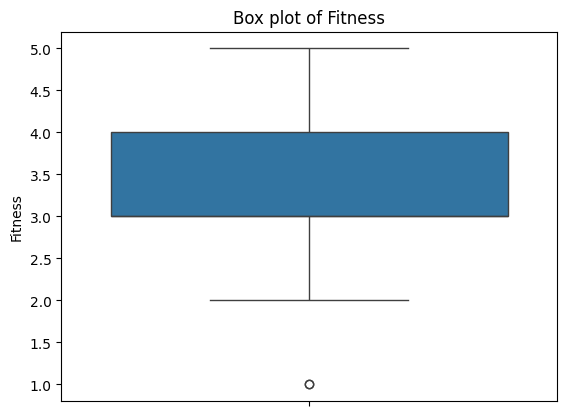

In [150]:
sns.boxplot(data= df['Fitness'])
plt.title('Box plot of Fitness')
plt.show()

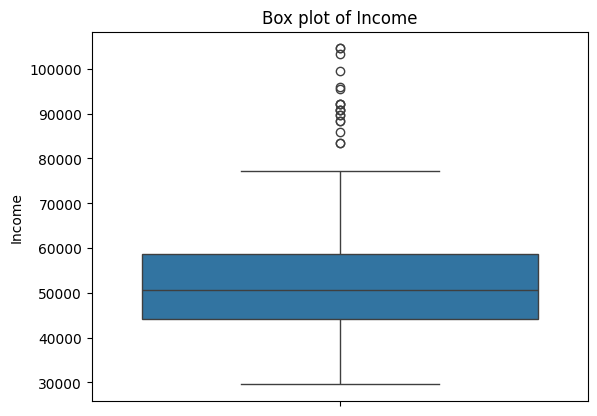

In [151]:
sns.boxplot(data= df['Income'])
plt.title('Box plot of Income')
plt.show()

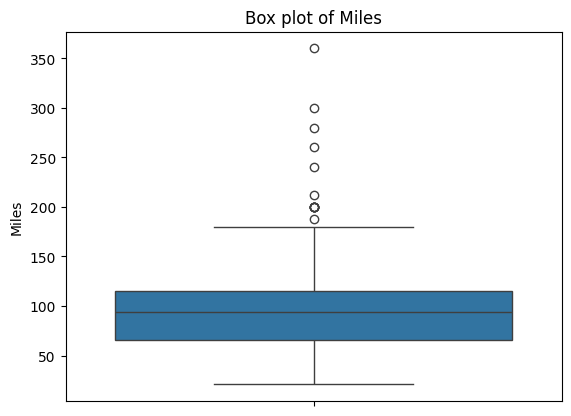

In [152]:
sns.boxplot(data= df['Miles'])
plt.title('Box plot of Miles')
plt.show()

# Clipping the Outliers (Using IQR Method)

In [153]:
def clip_iqr(column):
    upper_bound = np.percentile(df[column], 75) + 1.5 * iqr(df[column])
    lower_bound = np.percentile(df[column], 25) - 1.5 * iqr(df[column])
    return np.clip(df[column], lower_bound, upper_bound)

In [154]:
df['Education'] = clip_iqr('Education')
df['Age'] = clip_iqr('Age')
df['Usage'] = clip_iqr('Usage')
df['Fitness'] = clip_iqr('Fitness')
df['Income'] = clip_iqr('Income')
df['Miles'] = clip_iqr('Miles')

In [155]:
df['IncomeGroup'] = pd.cut(df['Income'], 3, labels=["Low", "Medium", "High"])
df["EducationCategory"] = pd.cut(df['Education'], bins=[10, 15, 17, 100], labels=['College', 'Graduate', 'Masters'])
df['AgeCategory'] = pd.cut(df['Age'], bins=[0, 25, 35, 100], labels=['Young', 'Adult', 'Senior Adults'])

In [156]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,IncomeGroup,EducationCategory,AgeCategory
0,KP281,18.0,Male,14,Single,3.0,4.0,29562.0,112.0,Low,College,Young
1,KP281,19.0,Male,15,Single,2.0,3.0,31836.0,75.0,Low,College,Young
2,KP281,19.0,Female,14,Partnered,4.0,3.0,30699.0,66.0,Low,College,Young
3,KP281,19.0,Male,12,Single,3.0,3.0,32973.0,85.0,Low,College,Young
4,KP281,20.0,Male,13,Partnered,4.0,2.0,35247.0,47.0,Low,College,Young


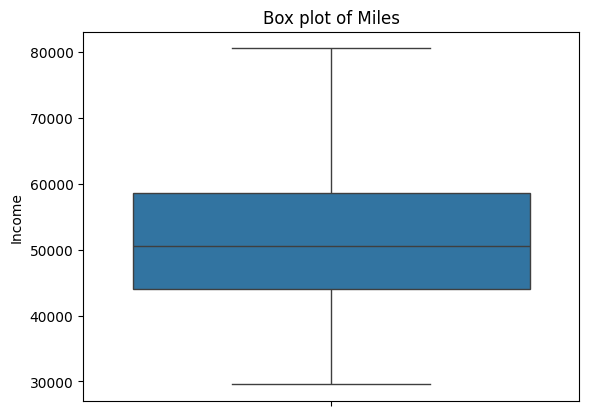

In [157]:
sns.boxplot(data= df['Income'])
plt.title('Box plot of Miles')
plt.show()

In [158]:
df['Usage'].unique()

array([3. , 2. , 4. , 5. , 5.5])

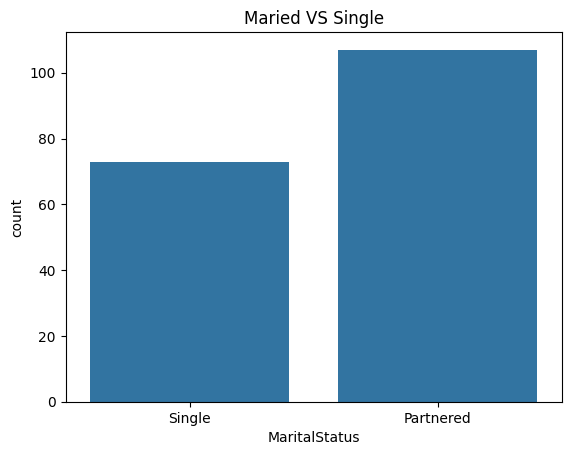

In [159]:
sns.countplot(data=df, x='MaritalStatus')
plt.title('Maried VS Single')
plt.show()

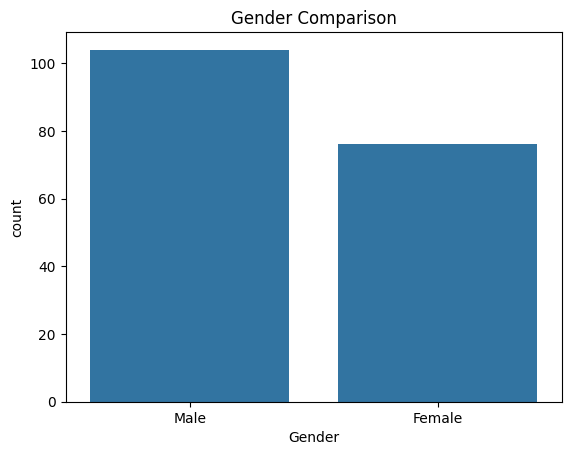

In [160]:
sns.countplot(data=df, x = 'Gender')
plt.title('Gender Comparison')
plt.show()

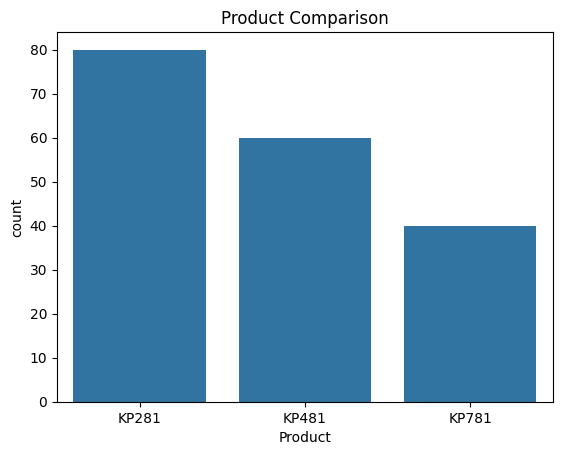

In [161]:
sns.countplot(data=df, x = 'Product')
plt.title('Product Comparison')
plt.show()

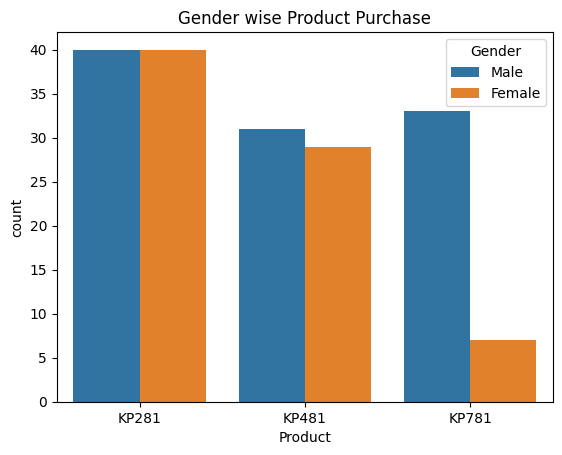

In [162]:
sns.countplot(data=df, x = 'Product', hue='Gender')
plt.title('Gender wise Product Purchase')
plt.show()

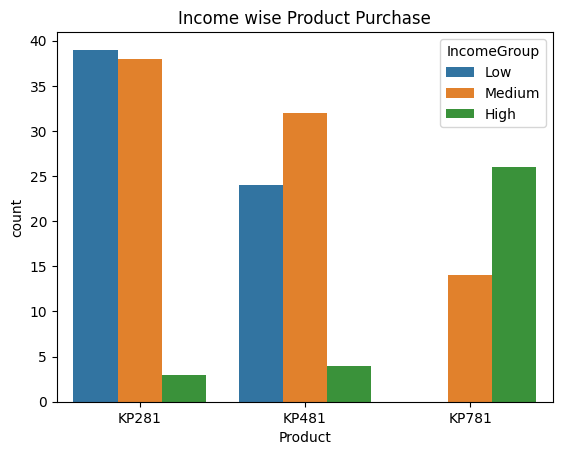

In [163]:
sns.countplot(data=df, x = 'Product', hue='IncomeGroup')
plt.title('Income wise Product Purchase')
plt.show()

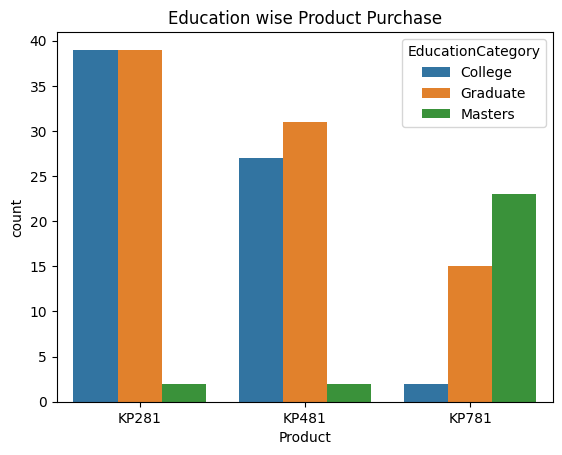

In [164]:
sns.countplot(data=df, x = 'Product', hue='EducationCategory')
plt.title('Education wise Product Purchase')
plt.show()

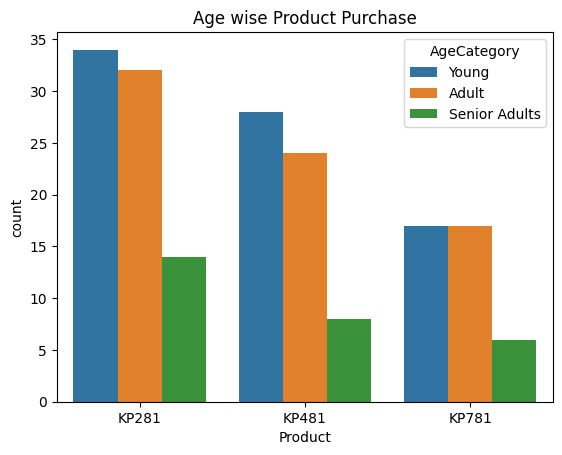

In [165]:
sns.countplot(data=df, x = 'Product', hue='AgeCategory')
plt.title('Age wise Product Purchase')
plt.show()

<Axes: xlabel='Age', ylabel='Miles'>

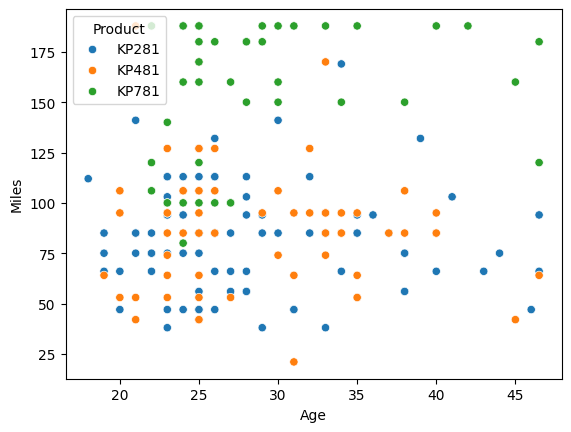

In [166]:
sns.scatterplot(data = df, x = 'Age', y = 'Miles', hue='Product')

<Axes: xlabel='Product', ylabel='Miles'>

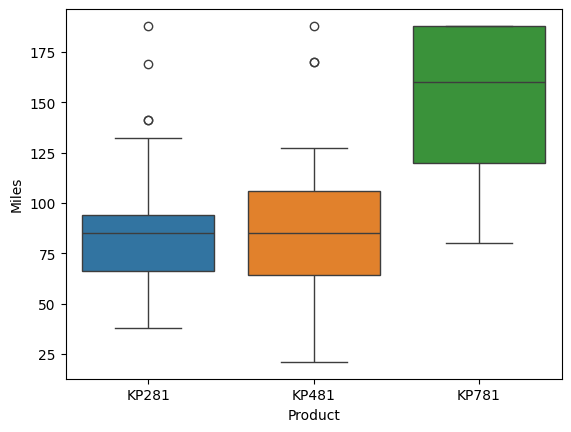

In [175]:
sns.boxplot(data = df, x = 'Product', y = 'Miles', hue='Product')

<Axes: xlabel='Usage', ylabel='Density'>

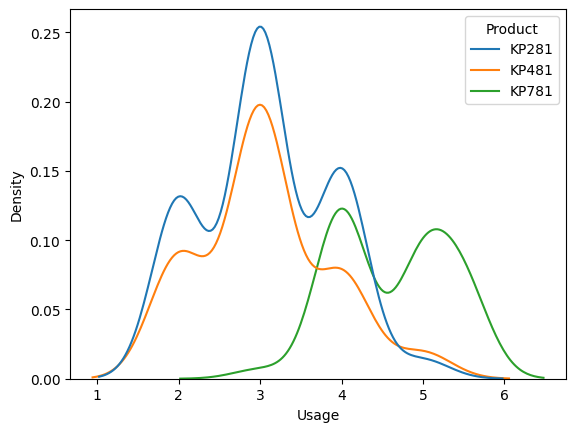

In [167]:
sns.kdeplot(data = df, x = 'Usage', hue='Product')

<Axes: xlabel='Fitness', ylabel='Density'>

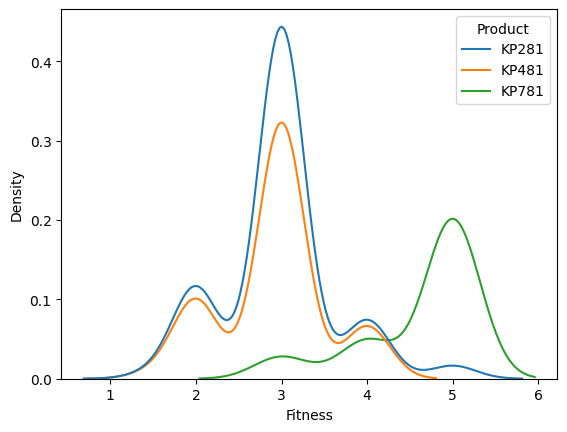

In [168]:
sns.kdeplot(data = df, x = 'Fitness', hue='Product')

In [169]:
pd.crosstab(df['Product'], df['Gender'], normalize=True)

Gender,Female,Male
Product,,
KP281,0.222222,0.222222
KP481,0.161111,0.172222
KP781,0.038889,0.183333


In [170]:
pd.crosstab(df['Product'], df['MaritalStatus'],normalize=True)

MaritalStatus,Partnered,Single
Product,,
KP281,0.266667,0.177778
KP481,0.200000,0.133333
KP781,0.127778,0.094444


In [171]:
df[df.select_dtypes(include=np.number).columns.tolist()].corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.296724,0.016908,0.059977,0.541735,0.024580
Education,0.296724,1.000000,0.400830,0.428993,0.646929,0.362232
Usage,0.016908,0.400830,1.000000,0.669979,0.487910,0.789161
Fitness,0.059977,0.428993,0.669979,1.000000,0.517979,0.833423
Income,0.541735,0.646929,0.487910,0.517979,1.000000,0.506625
Miles,0.024580,0.362232,0.789161,0.833423,0.506625,1.000000


<Axes: >

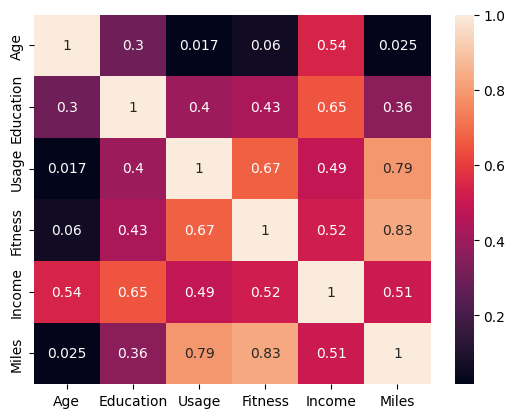

In [172]:
sns.heatmap(df[df.select_dtypes(include=np.number).columns.tolist()].corr(), annot=True)